In [65]:
import json
from pathlib import Path
from collections import Counter

print("✅ Import thành công!")

✅ Import thành công!


## 1. Load 2 datasets

In [66]:
# Đường dẫn files
vmlu_path = Path('../data/sft_generated_mcq/generated_mcq.jsonl')
vnhsge_path = Path('../data/sft_dataset_vnhsge/train_sft_cleaned.jsonl')

# Load VMLU dataset
vmlu_data = []
with open(vmlu_path, 'r', encoding='utf-8') as f:
    for line in f:
        vmlu_data.append(json.loads(line.strip()))

# Load VNHSGE dataset
vnhsge_data = []
with open(vnhsge_path, 'r', encoding='utf-8') as f:
    for line in f:
        vnhsge_data.append(json.loads(line.strip()))

print(f"📊 VMLU dataset: {len(vmlu_data)} samples")
print(f"📊 VNHSGE dataset: {len(vnhsge_data)} samples")
print(f"📊 TỔNG: {len(vmlu_data) + len(vnhsge_data)} samples")

📊 VMLU dataset: 1598 samples
📊 VNHSGE dataset: 1573 samples
📊 TỔNG: 3171 samples


## 2. Kiểm tra format

In [67]:
print("🔍 Sample từ VMLU:")
print(json.dumps(vmlu_data[0], ensure_ascii=False, indent=2))

print("\n" + "="*80 + "\n")

print("🔍 Sample từ VNHSGE:")
print(json.dumps(vnhsge_data[0], ensure_ascii=False, indent=2))

🔍 Sample từ VMLU:
{
  "messages": [
    {
      "role": "system",
      "content": "Bạn là trợ lý trả lời trắc nghiệm. Chỉ trả JSON duy nhất: {\"answer\":\"A\"} hoặc B/C/D."
    },
    {
      "role": "user",
      "content": "Mục đích chính của việc học môn Giáo dục Quốc phòng - An ninh (GDQP-AN) ở trường THPT là gì?\nA. Để biết cách sử dụng các loại vũ khí hiện đại.\nB. Trang bị kiến thức và kĩ năng cơ bản về quốc phòng, an ninh, đồng thời giáo dục lòng yêu nước và ý thức trách nhiệm công dân.\nC. Chuẩn bị cho việc gia nhập lực lượng vũ trang nhân dân sau khi tốt nghiệp.\nD. Rèn luyện thể lực và sức bền cho học sinh."
    },
    {
      "role": "assistant",
      "content": "{\"answer\":\"B\"}"
    }
  ],
  "id": "GDQP-AN_1",
  "subject": "GDQP-AN"
}


🔍 Sample từ VNHSGE:
{
  "messages": [
    {
      "role": "system",
      "content": "Bạn là trợ lý trả lời trắc nghiệm. Chỉ trả JSON duy nhất: {\"answer\":\"A\"} hoặc B/C/D."
    },
    {
      "role": "user",
      "content": "Có thể

## 3. Phân tích subject distribution

In [68]:
# Đếm subjects trong VMLU
vmlu_subjects = Counter([item.get('subject', 'Unknown') for item in vmlu_data])
print("📊 VMLU - Subject distribution:")
for subject, count in sorted(vmlu_subjects.items()):
    print(f"  {subject}: {count} samples ({count/len(vmlu_data)*100:.1f}%)")

print("\n" + "="*80 + "\n")

# Đếm subjects trong VNHSGE
vnhsge_subjects = Counter([item.get('subject', 'Unknown') for item in vnhsge_data])
print("📊 VNHSGE - Subject distribution:")
for subject, count in sorted(vnhsge_subjects.items()):
    print(f"  {subject}: {count} samples ({count/len(vnhsge_data)*100:.1f}%)")

print("\n" + "="*80 + "\n")

# Combined
all_subjects = vmlu_subjects + vnhsge_subjects
print("📊 COMBINED - Subject distribution:")
total_samples = len(vmlu_data) + len(vnhsge_data)
for subject, count in sorted(all_subjects.items()):
    print(f"  {subject}: {count} samples ({count/total_samples*100:.1f}%)")

📊 VMLU - Subject distribution:
  Arts: 200 samples (12.5%)
  GDKT-PL: 200 samples (12.5%)
  GDQP-AN: 198 samples (12.4%)
  GDTC: 200 samples (12.5%)
  InformationTechnology: 200 samples (12.5%)
  Literature: 200 samples (12.5%)
  Music: 200 samples (12.5%)
  Technology: 200 samples (12.5%)


📊 VNHSGE - Subject distribution:
  Biology: 190 samples (12.1%)
  Chemistry: 196 samples (12.5%)
  CivicEducation: 200 samples (12.7%)
  English: 250 samples (15.9%)
  Geography: 190 samples (12.1%)
  History: 200 samples (12.7%)
  Mathematics: 180 samples (11.4%)
  Physics: 167 samples (10.6%)


📊 COMBINED - Subject distribution:
  Arts: 200 samples (6.3%)
  Biology: 190 samples (6.0%)
  Chemistry: 196 samples (6.2%)
  CivicEducation: 200 samples (6.3%)
  English: 250 samples (7.9%)
  GDKT-PL: 200 samples (6.3%)
  GDQP-AN: 198 samples (6.2%)
  GDTC: 200 samples (6.3%)
  Geography: 190 samples (6.0%)
  History: 200 samples (6.3%)
  InformationTechnology: 200 samples (6.3%)
  Literature: 200 samples

## 4. Merge datasets

In [69]:
# Kết hợp 2 datasets
merged_data = vmlu_data + vnhsge_data

print(f"✅ Đã merge thành công!")
print(f"📊 Tổng số samples: {len(merged_data)}")
print(f"   - VMLU: {len(vmlu_data)} samples")
print(f"   - VNHSGE: {len(vnhsge_data)} samples")

✅ Đã merge thành công!
📊 Tổng số samples: 3171
   - VMLU: 1598 samples
   - VNHSGE: 1573 samples


## 4.1. Phân tích phân bố đáp án

📊 VMLU - Phân bố đáp án đúng:
  A:  123 câu (  7.7%)
  B:  590 câu ( 36.9%)
  C:  751 câu ( 47.0%)
  D:  134 câu (  8.4%)


📊 VNHSGE - Phân bố đáp án đúng:
  A:  471 câu ( 29.9%)
  B:  389 câu ( 24.7%)
  C:  373 câu ( 23.7%)
  D:  340 câu ( 21.6%)


📊 MERGED - Phân bố đáp án đúng:
  A:  594 câu ( 18.7%)
  B:  979 câu ( 30.9%)
  C: 1124 câu ( 35.4%)
  D:  474 câu ( 14.9%)


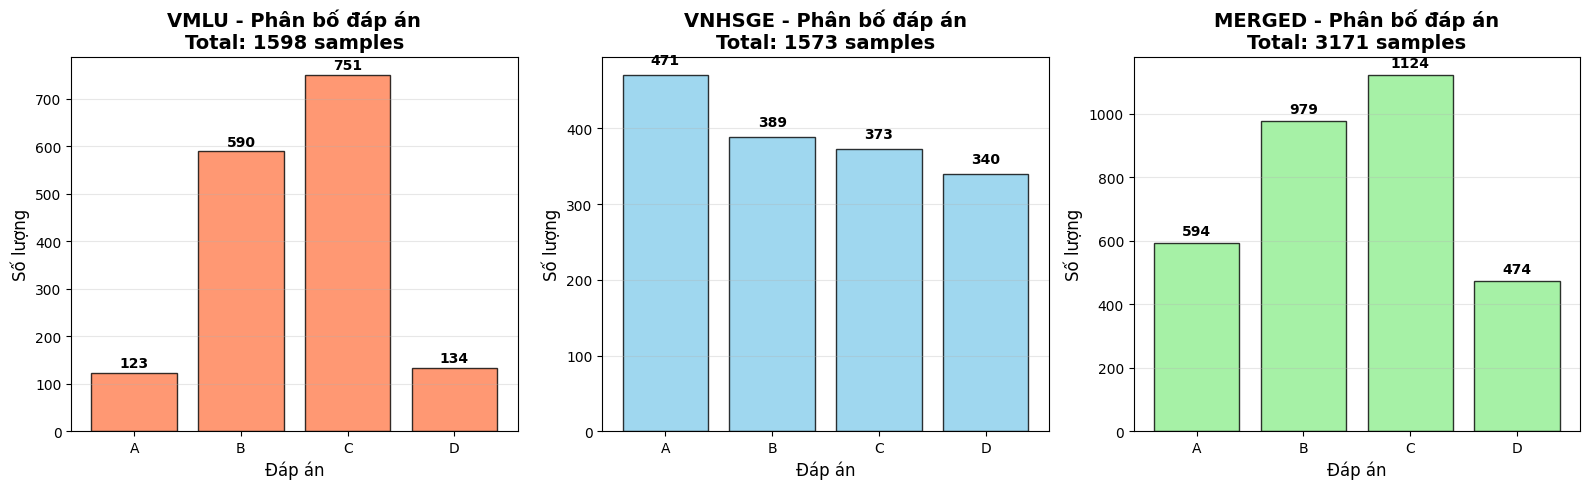


⚖️ Kiểm tra độ balanced:
VMLU - Độ lệch chuẩn: 276.94
VNHSGE - Độ lệch chuẩn: 48.24
MERGED - Độ lệch chuẩn: 267.17

💡 Độ lệch chuẩn càng nhỏ thì dataset càng balanced


In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Hàm trích xuất đáp án từ assistant message
def extract_answer(item):
    """Trích xuất đáp án từ assistant message"""
    for msg in item.get('messages', []):
        if msg.get('role') == 'assistant':
            content = msg.get('content', '')
            # Parse JSON để lấy answer
            try:
                answer_dict = json.loads(content)
                return answer_dict.get('answer', None)
            except:
                return None
    return None

# Đếm phân bố đáp án
vmlu_answers = [extract_answer(item) for item in vmlu_data]
vmlu_answers = [a for a in vmlu_answers if a is not None]
vmlu_answer_counts = Counter(vmlu_answers)

vnhsge_answers = [extract_answer(item) for item in vnhsge_data]
vnhsge_answers = [a for a in vnhsge_answers if a is not None]
vnhsge_answer_counts = Counter(vnhsge_answers)

merged_answers = vmlu_answers + vnhsge_answers
merged_answer_counts = Counter(merged_answers)

# In thống kê
print("📊 VMLU - Phân bố đáp án đúng:")
for answer in ['A', 'B', 'C', 'D']:
    count = vmlu_answer_counts.get(answer, 0)
    print(f"  {answer}: {count:4d} câu ({count/len(vmlu_answers)*100:5.1f}%)")

print("\n" + "="*80 + "\n")

print("📊 VNHSGE - Phân bố đáp án đúng:")
for answer in ['A', 'B', 'C', 'D']:
    count = vnhsge_answer_counts.get(answer, 0)
    print(f"  {answer}: {count:4d} câu ({count/len(vnhsge_answers)*100:5.1f}%)")

print("\n" + "="*80 + "\n")

print("📊 MERGED - Phân bố đáp án đúng:")
for answer in ['A', 'B', 'C', 'D']:
    count = merged_answer_counts.get(answer, 0)
    print(f"  {answer}: {count:4d} câu ({count/len(merged_answers)*100:5.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

answers = ['A', 'B', 'C', 'D']

# VMLU
vmlu_counts = [vmlu_answer_counts.get(a, 0) for a in answers]
axes[0].bar(answers, vmlu_counts, color='coral', alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Đáp án', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].set_title(f'VMLU - Phân bố đáp án\nTotal: {len(vmlu_answers)} samples', 
                  fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')
for i, v in enumerate(vmlu_counts):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# VNHSGE
vnhsge_counts = [vnhsge_answer_counts.get(a, 0) for a in answers]
axes[1].bar(answers, vnhsge_counts, color='skyblue', alpha=0.8, edgecolor='black')
axes[1].set_xlabel('Đáp án', fontsize=12)
axes[1].set_ylabel('Số lượng', fontsize=12)
axes[1].set_title(f'VNHSGE - Phân bố đáp án\nTotal: {len(vnhsge_answers)} samples', 
                  fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')
for i, v in enumerate(vnhsge_counts):
    axes[1].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Merged
merged_counts = [merged_answer_counts.get(a, 0) for a in answers]
axes[2].bar(answers, merged_counts, color='lightgreen', alpha=0.8, edgecolor='black')
axes[2].set_xlabel('Đáp án', fontsize=12)
axes[2].set_ylabel('Số lượng', fontsize=12)
axes[2].set_title(f'MERGED - Phân bố đáp án\nTotal: {len(merged_answers)} samples', 
                  fontsize=14, fontweight='bold')
axes[2].grid(alpha=0.3, axis='y')
for i, v in enumerate(merged_counts):
    axes[2].text(i, v + 15, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Kiểm tra balance
print(f"\n⚖️ Kiểm tra độ balanced:")
print(f"VMLU - Độ lệch chuẩn: {np.std(vmlu_counts):.2f}")
print(f"VNHSGE - Độ lệch chuẩn: {np.std(vnhsge_counts):.2f}")
print(f"MERGED - Độ lệch chuẩn: {np.std(merged_counts):.2f}")
print(f"\n💡 Độ lệch chuẩn càng nhỏ thì dataset càng balanced")

## 4.5. Rebalance đáp án bằng cách shuffle A/B/C/D

Vì phân bố đáp án không cân bằng (C: 35%, D: 15%), ta sẽ shuffle ngẫu nhiên vị trí của các đáp án để cân bằng lại.

In [71]:
import random
import copy

def shuffle_answer_positions(item, seed=None):
    """
    Shuffle vị trí của các đáp án A/B/C/D và update answer key tương ứng
    
    Args:
        item: Dictionary chứa messages với user content có format câu hỏi + 4 đáp án
        seed: Random seed để reproduce (optional)
    
    Returns:
        item với đáp án đã được shuffle
    """
    if seed is not None:
        random.seed(seed)
    
    # Tìm user message
    for msg_idx, msg in enumerate(item.get('messages', [])):
        if msg.get('role') == 'user':
            content = msg.get('content', '')
            lines = content.split('\n')
            
            # Tách câu hỏi và đáp án
            question_lines = []
            answer_lines = []
            
            for line in lines:
                if line.strip().startswith(('A. ', 'B. ', 'C. ', 'D. ')):
                    answer_lines.append(line.strip())
                else:
                    question_lines.append(line)
            
            # Nếu có đủ 4 đáp án thì shuffle
            if len(answer_lines) == 4:
                # Parse đáp án
                answers_dict = {}
                for line in answer_lines:
                    key = line[0]  # A, B, C, hoặc D
                    value = line[3:]  # Text sau "X. "
                    answers_dict[key] = value
                
                # ✅ FIX: Check xem có đủ 4 keys A, B, C, D không
                if not all(k in answers_dict for k in ['A', 'B', 'C', 'D']):
                    # Skip nếu không đủ 4 đáp án
                    print(msg)
                    continue
                
                # Lấy đáp án đúng hiện tại
                old_correct = None
                for msg2 in item.get('messages', []):
                    if msg2.get('role') == 'assistant':
                        try:
                            ans_dict = json.loads(msg2.get('content', '{}'))
                            old_correct = ans_dict.get('answer')
                        except:
                            pass
                
                if old_correct and old_correct in answers_dict:
                    # Lấy content của 4 đáp án
                    answer_values = [answers_dict['A'], answers_dict['B'], 
                                   answers_dict['C'], answers_dict['D']]
                    
                    # Shuffle content
                    random.shuffle(answer_values)
                    
                    # Map lại: A/B/C/D → shuffled content
                    new_answers_dict = {
                        'A': answer_values[0],
                        'B': answer_values[1],
                        'C': answer_values[2],
                        'D': answer_values[3]
                    }
                    
                    # Tìm đáp án đúng mới (vị trí của old_correct trong shuffled content)
                    old_correct_value = answers_dict[old_correct]
                    new_correct = None
                    for key, value in new_answers_dict.items():
                        if value == old_correct_value:
                            new_correct = key
                            break
                    
                    # Rebuild answer lines
                    new_answer_lines = [
                        f"A. {new_answers_dict['A']}",
                        f"B. {new_answers_dict['B']}",
                        f"C. {new_answers_dict['C']}",
                        f"D. {new_answers_dict['D']}"
                    ]
                    
                    # Rebuild user content
                    new_content = '\n'.join(question_lines + new_answer_lines)
                    item['messages'][msg_idx]['content'] = new_content
                    
                    # Update assistant answer
                    for msg2_idx, msg2 in enumerate(item.get('messages', [])):
                        if msg2.get('role') == 'assistant':
                            item['messages'][msg2_idx]['content'] = f'{{"answer":"{new_correct}"}}' 
                            break
    
    return item


# Test trên 1 sample
print("🧪 Testing answer shuffling...")
test_item = copy.deepcopy(merged_data[0])
print("\n📝 Original:")
print(f"User: {test_item['messages'][1]['content'][:200]}...")
print(f"Assistant: {test_item['messages'][2]['content']}")

shuffled_test = shuffle_answer_positions(test_item, seed=42)
print("\n🔀 After shuffle:")
print(f"User: {shuffled_test['messages'][1]['content'][:200]}...")
print(f"Assistant: {shuffled_test['messages'][2]['content']}")

🧪 Testing answer shuffling...

📝 Original:
User: Mục đích chính của việc học môn Giáo dục Quốc phòng - An ninh (GDQP-AN) ở trường THPT là gì?
A. Để biết cách sử dụng các loại vũ khí hiện đại.
B. Trang bị kiến thức và kĩ năng cơ bản về quốc phòng, an...
Assistant: {"answer":"B"}

🔀 After shuffle:
User: Mục đích chính của việc học môn Giáo dục Quốc phòng - An ninh (GDQP-AN) ở trường THPT là gì?
A. Chuẩn bị cho việc gia nhập lực lượng vũ trang nhân dân sau khi tốt nghiệp.
B. Trang bị kiến thức và kĩ n...
Assistant: {"answer":"B"}


In [72]:
import copy

# Apply shuffling cho toàn bộ dataset
print("🔄 Shuffling answer positions for all samples...")
print(f"Total samples: {len(merged_data)}")

# Shuffle với seed khác nhau cho mỗi sample (dựa trên index)
rebalanced_data = []
for idx, item in enumerate(merged_data):
    shuffled_item = shuffle_answer_positions(copy.deepcopy(item), seed=idx)
    rebalanced_data.append(shuffled_item)

print(f"✅ Completed! Shuffled {len(rebalanced_data)} samples")

# Kiểm tra phân bố đáp án sau khi shuffle
rebalanced_answers = [extract_answer(item) for item in rebalanced_data]
rebalanced_answers = [a for a in rebalanced_answers if a is not None]
rebalanced_answer_counts = Counter(rebalanced_answers)

print("\n📊 Phân bố đáp án SAU KHI REBALANCE:")
for answer in ['A', 'B', 'C', 'D']:
    count = rebalanced_answer_counts.get(answer, 0)
    print(f"  {answer}: {count:4d} câu ({count/len(rebalanced_answers)*100:5.1f}%)")

# So sánh với trước đó
print("\n" + "="*80)
print("📊 SO SÁNH TRƯỚC VÀ SAU:")
print("="*80)
print(f"{'Đáp án':<10} {'Trước':<20} {'Sau':<20} {'Thay đổi':<15}")
print("-"*80)
for answer in ['A', 'B', 'C', 'D']:
    before = merged_answer_counts.get(answer, 0)
    after = rebalanced_answer_counts.get(answer, 0)
    before_pct = before/len(merged_answers)*100
    after_pct = after/len(rebalanced_answers)*100
    change = after_pct - before_pct
    print(f"{answer:<10} {before:4d} ({before_pct:5.1f}%)    {after:4d} ({after_pct:5.1f}%)    {change:+6.1f}%")

🔄 Shuffling answer positions for all samples...
Total samples: 3171
✅ Completed! Shuffled 3171 samples

📊 Phân bố đáp án SAU KHI REBALANCE:
  A:  779 câu ( 24.6%)
  B:  806 câu ( 25.4%)
  C:  815 câu ( 25.7%)
  D:  771 câu ( 24.3%)

📊 SO SÁNH TRƯỚC VÀ SAU:
Đáp án     Trước                Sau                  Thay đổi       
--------------------------------------------------------------------------------
A           594 ( 18.7%)     779 ( 24.6%)      +5.8%
B           979 ( 30.9%)     806 ( 25.4%)      -5.5%
C          1124 ( 35.4%)     815 ( 25.7%)      -9.7%
D           474 ( 14.9%)     771 ( 24.3%)      +9.4%


C:\Users\Admin\AppData\Local\Temp\ipykernel_18876\502735061.py:34: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


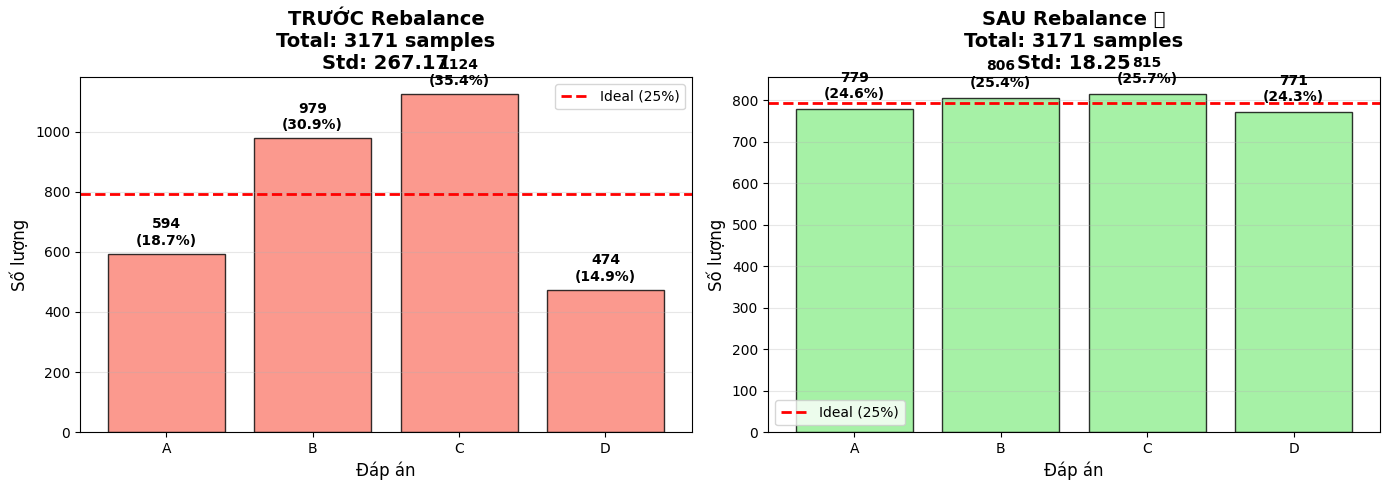


⚖️ Độ cân bằng:
TRƯỚC rebalance - Độ lệch chuẩn: 267.17
SAU rebalance   - Độ lệch chuẩn: 18.25
✅ Cải thiện: 93.2%

💡 Lý tưởng: Mỗi đáp án ~793 câu (25%)


In [73]:
# Visualize so sánh
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

answers = ['A', 'B', 'C', 'D']

# Before rebalancing
before_counts = [merged_answer_counts.get(a, 0) for a in answers]
axes[0].bar(answers, before_counts, color='salmon', alpha=0.8, edgecolor='black')
axes[0].axhline(y=len(merged_answers)/4, color='red', linestyle='--', linewidth=2, label='Ideal (25%)')
axes[0].set_xlabel('Đáp án', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].set_title(f'TRƯỚC Rebalance\nTotal: {len(merged_answers)} samples\nStd: {np.std(before_counts):.2f}', 
                  fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')
axes[0].legend()
for i, v in enumerate(before_counts):
    pct = v/len(merged_answers)*100
    axes[0].text(i, v + 20, f'{v}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

# After rebalancing
after_counts = [rebalanced_answer_counts.get(a, 0) for a in answers]
axes[1].bar(answers, after_counts, color='lightgreen', alpha=0.8, edgecolor='black')
axes[1].axhline(y=len(rebalanced_answers)/4, color='red', linestyle='--', linewidth=2, label='Ideal (25%)')
axes[1].set_xlabel('Đáp án', fontsize=12)
axes[1].set_ylabel('Số lượng', fontsize=12)
axes[1].set_title(f'SAU Rebalance ✅\nTotal: {len(rebalanced_answers)} samples\nStd: {np.std(after_counts):.2f}', 
                  fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')
axes[1].legend()
for i, v in enumerate(after_counts):
    pct = v/len(rebalanced_answers)*100
    axes[1].text(i, v + 20, f'{v}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Thống kê độ cân bằng
print(f"\n⚖️ Độ cân bằng:")
print(f"TRƯỚC rebalance - Độ lệch chuẩn: {np.std(before_counts):.2f}")
print(f"SAU rebalance   - Độ lệch chuẩn: {np.std(after_counts):.2f}")
improvement = (np.std(before_counts) - np.std(after_counts)) / np.std(before_counts) * 100
print(f"✅ Cải thiện: {improvement:.1f}%")
print(f"\n💡 Lý tưởng: Mỗi đáp án ~{len(rebalanced_answers)/4:.0f} câu (25%)")

In [74]:
# Verify một vài samples
print("🔍 Verify một số samples sau khi shuffle:\n")

for i in [0, 100, 500]:
    print(f"{'='*80}")
    print(f"Sample {i}:")
    print(f"{'='*80}")
    
    # Original
    orig_msg = merged_data[i]['messages'][1]['content']
    orig_ans = extract_answer(merged_data[i])
    
    # Rebalanced
    rebal_msg = rebalanced_data[i]['messages'][1]['content']
    rebal_ans = extract_answer(rebalanced_data[i])
    
    print("\n📝 ORIGINAL:")
    print(orig_msg[:150] + "...")
    print(f"Answer: {orig_ans}")
    
    print("\n🔀 AFTER SHUFFLE:")
    print(rebal_msg[:150] + "...")
    print(f"Answer: {rebal_ans}")
    print()

🔍 Verify một số samples sau khi shuffle:

Sample 0:

📝 ORIGINAL:
Mục đích chính của việc học môn Giáo dục Quốc phòng - An ninh (GDQP-AN) ở trường THPT là gì?
A. Để biết cách sử dụng các loại vũ khí hiện đại.
B. Tran...
Answer: B

🔀 AFTER SHUFFLE:
Mục đích chính của việc học môn Giáo dục Quốc phòng - An ninh (GDQP-AN) ở trường THPT là gì?
A. Chuẩn bị cho việc gia nhập lực lượng vũ trang nhân dân...
Answer: C

Sample 100:

📝 ORIGINAL:
Mục đích cao nhất của nền quốc phòng toàn dân, an ninh nhân dân ở Việt Nam là gì?
A. Bảo vệ Đảng, Nhà nước và chế độ xã hội chủ nghĩa.
B. Bảo vệ độc l...
Answer: B

🔀 AFTER SHUFFLE:
Mục đích cao nhất của nền quốc phòng toàn dân, an ninh nhân dân ở Việt Nam là gì?
A. Bảo vệ Đảng, Nhà nước và chế độ xã hội chủ nghĩa.
B. Giữ vững ổn ...
Answer: D

Sample 500:

📝 ORIGINAL:
Trong một bảng cơ sở dữ liệu quan hệ, 'khóa chính' (Primary Key) có vai trò quan trọng nhất là gì?
A. Đảm bảo dữ liệu không bị trùng lặp giữa các cột....
Answer: D

🔀 AFTER SHUFFLE:
Trong một

## 4.6. Quyết định sử dụng dataset nào

Chọn dataset để save và sử dụng cho training:
- **Option 1:** `merged_data` - Dataset gốc (không balanced)
- **Option 2:** `rebalanced_data` - Dataset đã shuffle đáp án (balanced) ✅ Recommended

In [75]:
# Chọn dataset để sử dụng
USE_REBALANCED = True  # Set True để dùng rebalanced, False để dùng original

if USE_REBALANCED:
    final_data = rebalanced_data
    print("✅ Sử dụng REBALANCED dataset (đáp án đã được shuffle)")
    print(f"📊 Phân bố cân bằng hơn (std: {np.std(after_counts):.2f})")
else:
    final_data = merged_data
    print("ℹ️  Sử dụng ORIGINAL dataset (không shuffle)")
    print(f"📊 Phân bố gốc (std: {np.std(before_counts):.2f})")

print(f"\n📦 Total samples: {len(final_data)}")

✅ Sử dụng REBALANCED dataset (đáp án đã được shuffle)
📊 Phân bố cân bằng hơn (std: 18.25)

📦 Total samples: 3171


## 5. (Optional) Shuffle dataset

In [76]:
import random

# Tùy chọn: Shuffle để trộn đều 2 datasets
# Uncomment dòng dưới nếu muốn shuffle
# random.seed(42)
# random.shuffle(merged_data)

print("ℹ️ Dataset giữ nguyên thứ tự (VMLU trước, VNHSGE sau)")
print("💡 Uncomment dòng random.shuffle() nếu muốn trộn ngẫu nhiên")

ℹ️ Dataset giữ nguyên thứ tự (VMLU trước, VNHSGE sau)
💡 Uncomment dòng random.shuffle() nếu muốn trộn ngẫu nhiên


## 6. Kiểm tra duplicate IDs

In [77]:
# Kiểm tra có ID trùng không
all_ids = [item['id'] for item in merged_data if 'id' in item]
unique_ids = set(all_ids)

print(f"📊 Tổng số IDs: {len(all_ids)}")
print(f"📊 Số IDs unique: {len(unique_ids)}")

if len(all_ids) != len(unique_ids):
    duplicates = [id for id in all_ids if all_ids.count(id) > 1]
    print(f"⚠️ Có {len(set(duplicates))} IDs bị trùng!")
    print(f"   Ví dụ: {list(set(duplicates))[:5]}")
else:
    print("✅ Không có IDs trùng lặp!")

📊 Tổng số IDs: 3171
📊 Số IDs unique: 3171
✅ Không có IDs trùng lặp!


## 7. Save merged dataset

In [78]:
# Lưu file merged (sử dụng final_data đã chọn ở trên)
output_path = Path('../data/train_sft_final.jsonl')

with open(output_path, 'w', encoding='utf-8') as f:
    for item in final_data:
        f.write(json.dumps(item, ensure_ascii=False) + '\n')

print(f"✅ Đã lưu file merged vào: {output_path}")
print(f"📊 Tổng số samples: {len(final_data)}")
print(f"📦 Kích thước file: {output_path.stat().st_size / (1024*1024):.2f} MB")

✅ Đã lưu file merged vào: ..\data\train_sft_final.jsonl
📊 Tổng số samples: 3171
📦 Kích thước file: 2.11 MB


## 8. Verify merged file

In [79]:
# Đọc lại file để verify (sử dụng final_data đã chọn ở trên)
verify_data = []
with open(output_path, 'r', encoding='utf-8') as f:
    for line in f:
        verify_data.append(json.loads(line.strip()))

print(f"✅ Verify thành công!")
print(f"📊 Số samples trong file: {len(verify_data)}")
print(f"📊 Khớp với final_data: {len(verify_data) == len(final_data)}")

# Hiển thị một vài samples từ file merged
print("\n🔍 Sample đầu tiên:")
print(json.dumps(verify_data[0], ensure_ascii=False, indent=2))

if len(verify_data) > len(vmlu_data):
    print(f"\n🔍 Sample từ VNHSGE (index {len(vmlu_data)}):")
    print(json.dumps(verify_data[len(vmlu_data)], ensure_ascii=False, indent=2))

✅ Verify thành công!
📊 Số samples trong file: 3171
📊 Khớp với final_data: True

🔍 Sample đầu tiên:
{
  "messages": [
    {
      "role": "system",
      "content": "Bạn là trợ lý trả lời trắc nghiệm. Chỉ trả JSON duy nhất: {\"answer\":\"A\"} hoặc B/C/D."
    },
    {
      "role": "user",
      "content": "Mục đích chính của việc học môn Giáo dục Quốc phòng - An ninh (GDQP-AN) ở trường THPT là gì?\nA. Chuẩn bị cho việc gia nhập lực lượng vũ trang nhân dân sau khi tốt nghiệp.\nB. Để biết cách sử dụng các loại vũ khí hiện đại.\nC. Trang bị kiến thức và kĩ năng cơ bản về quốc phòng, an ninh, đồng thời giáo dục lòng yêu nước và ý thức trách nhiệm công dân.\nD. Rèn luyện thể lực và sức bền cho học sinh."
    },
    {
      "role": "assistant",
      "content": "{\"answer\":\"C\"}"
    }
  ],
  "id": "GDQP-AN_1",
  "subject": "GDQP-AN"
}

🔍 Sample từ VNHSGE (index 1598):
{
  "messages": [
    {
      "role": "system",
      "content": "Bạn là trợ lý trả lời trắc nghiệm. Chỉ trả JSON duy nhất

## 📋 Tổng kết

### Kết quả:
- ✅ Đã merge 2 datasets thành công
- ✅ File output: `data/train_sft_final.jsonl`
- ✅ Không có IDs trùng lặp
- ✅ Đã verify file output

### Bước tiếp theo:
1. 🔄 Sử dụng file `train_sft_final.jsonl` để training
2. 🎯 Có thể apply thêm data augmentation trên file này
3. 🤔 Có thể thêm reasoning hoặc custom system prompts

### Lưu ý:
- Dataset giữ nguyên thứ tự: VMLU trước, VNHSGE sau
- Nếu muốn shuffle, uncomment dòng `random.shuffle()` ở cell 5
- Cả 2 datasets đều đã được filter chỉ giữ câu hỏi có 4 đáp án